# Deep Learning Homework

Welcome everyone! This homework will help you get some familiarity with how machine (deep) learning and neural networks are used in practice. Don't worry if you don't have any coding experience. Just try following the instructions.

Try to keep the worksheet organized as you will have to submit it at the end. You are also free to add comments to this worksheet.

Some *hints* for how to use this worksheet:
* To _execute_ the code in a cell, press the little 'Run' icon on the left of code.
* The "Run" icon will have a rotating circle when the code is running. Sometimes there is no output even if execution is successful, so don't be surprised. The very first cell block you run might take a while.
* _Be careful_ with the order of executing. If you go in order, nothing unexpected will happen, but if you jump around and execute cell out of order, it might mess things up. If you want to start with a clean slate, just restart from running the first block of code.
* If you leave your workbook and come back later, the server may stop in the meanwhile and it will "forget" everything it has already computed. So you need to rerun all the cells from the beginning. If in doubt, just start clean.
* To _insert_ a cell use the "+" icon.
* Most of the code (the important parts) are fairly simple. The longer/complicated parts are for plotting graphs. So don't worry if you can't follow those.

## Preliminaries

Let's get started. The following code will just import some libraries. The most important ones are tensorflow and keras. These are the main neural network libraries. The others are useful utilities mostly for plotting and some math/stats shortcuts.

Go ahead and execute the cell below. If you see the version of Tensorflow (2.5.0) as a result, all is good.

In [1]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import itertools
#This is just an example comment
print(tf.__version__)

2.4.1


## Load and Inspect Data

Let's load the data. We will use compressed images from a fashion magazine. This is a nice clean dataset used in many tutorials. You can find more info [here](https://www.kaggle.com/zalando-research/fashionmnist). 

The first line points to the data, the second line loads the data. There are four parts to it. It's divided to _train_ and _test_. Within each there are the images and the labels, hence 2x2=4 objects. The third line will display the shape of the training image object. It should show you (60000,28,28), meaning that there are 60,000 images and each image consist of 28x28 pixels.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = fashion_mnist.load_data()
mnist_train_images.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)



Ok, here is the first task. Create a cell below and try to figure out how many images are in the **test** set.

### <span style="color:red">__Question 1:__</span> How many images are in the test set?

**Hint**:
Copy and paste the last line of code above. change the word "train" to "test".


---
Take a look at the first image. Programmers always start indexing at 0 so that's why you have `mnist_train_images[0]` in the code. Each pixel is a number between 0 and 255 representing the intensity (how light or dark) of the pixel (the images are not colored, we are just showing the darkness with colors here).

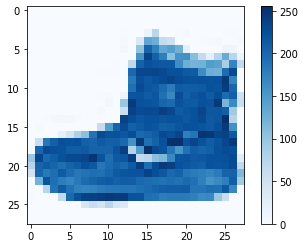

In [3]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='Blues')
plt.colorbar()
plt.grid(False)

Now let's see what the label of this image is.

In [4]:
mnist_train_labels[0]

9

---
Well, it's 9. Looks like a boot, but we got a number. The reason is that the data we loaded **does not** contain the text labels, just a number for each category. Therefore, we need to manually specify the textual labels in the following code cell. (Note that when you execute the cell, it will not display any output).

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

But with the class names defined, we can easily display the label for the first training image (indexed as 0).

In [6]:
class_names[mnist_train_labels[0]]

'Ankle boot'

---
Ok, now you try.
### <span style="color:red">__Question 2:__</span> What is the label of the second training image?
**Hint** Copy and past the last line of code above and change "0" to "1".

## Data preprocessing
Cleaning/preprocessing data is usually a gigantic task. This data set that we are using is already very clean and nice, so we just need to complete some very simple steps.

The first one is to normalize the images so that the intensity of a pixel is measured between 0 and 1 and not 0 and 255. (This is not strictly necessary for things to work, but often helps and makes the training faster. We do so by dividing the intensity by 255.

In [7]:
mnist_train_images = mnist_train_images / 255.0
mnist_test_images = mnist_test_images / 255.0
print("Finished. Don't rerun.")

Finished. Don't rerun.


---
If you executed the block above, it will not give an output, but let's see if it worked. Let's plot the first image again.

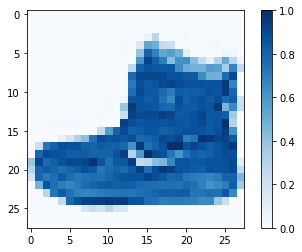

In [8]:
plt.figure()
plt.imshow(mnist_train_images[0],cmap='Blues')
plt.colorbar()
plt.grid(False)

All good. Maximum intensity (shown on the right side) is now 1.0. Now let's take a look a few more training images (the first 49). Don't worry about the next code, it just creates a nice grid of images. Just pay attention to the _last two lines_ where we tell it to display the labels from the `mnist_train_labels` and the images from the `mnist_train_images`. The `[i]` means that we want to display the label/image with index `i`.

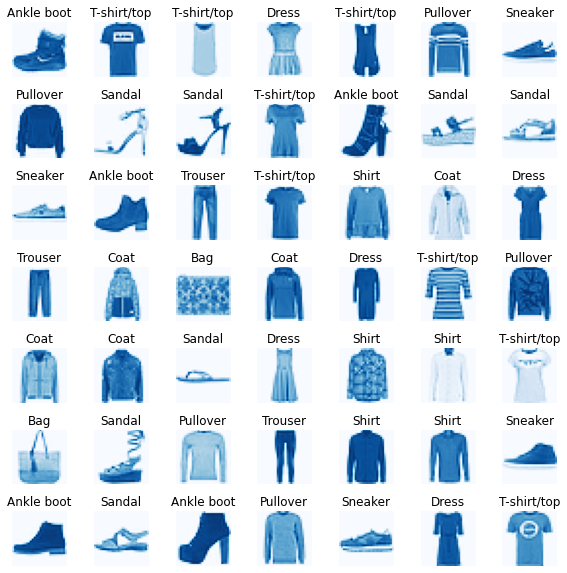

In [12]:
plt.figure(figsize=(10,10))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title(class_names[mnist_train_labels[i]])
    plt.imshow(mnist_train_images[i], cmap='Blues')
   

Let's try the same thing for the **test** images. We want to make sure that those look reasonable as well. 

### <span style="color:red">__Question 3:__</span>Display the first 49 **test** images. 
**Hint**: Copy and modify the code from above and replace "train" with "test" in the last two lines*



### <span style="color:red">__Question 4:__</span> What is the label of the first test image?

One last step before we get to neural networks. Remember, how we want to have more than just training and test data. We want to experiment with different models, so we want to split the training data further and save some of it for validation. That is what the following line of code does. The first line splits the training data into two parts. 80% of it we will actually use for training and 20% for validation. The second line just displays the size of the validation set:

In [13]:
our_train_images, our_val_images, our_train_labels, our_val_labels = train_test_split(mnist_train_images, mnist_train_labels, test_size=12000)
our_val_images.shape

(12000, 28, 28)

---
A simple question: what is the size of the set that we will actually use for training? You can use code or just calculate it manually.

### <span style="color:red">__Question 5:__</span> How many images are in our new training data set, that we will actually use for training? 
**Hint**: The last line of code gives the size of our new *validation* data set. Copy and change "val" to "train".

## Neural Network Setup
Finally! We are ready to set up a neural network. 

* The first line below creates an empty network and you add layers one by one. Our first network is super simple. It has two layers: an input layer and an output layer, no hidden layers! 
* The input layer defined in the second line is simply a 28x28=784 dimensional vector, where each dimension corresponds to a pixel in the input image. 
* The output layer given in the third line is just 10 nodes, where each node corresponds to one of the categories. The activation levels of these output nodes will give us the prediction. The highest activation is the predicted category. (The 'softmax' activation makes sure that the activations in this layer add up to 1 so the activations are very easy to interpret as a probability of being in the class). This layer is 'dense' because all nodes in the output layer are connected to all nodes in the input layer. 
* The fourth line is where we specify the loss function, what "optimizer" to use and what metrics to display. Don't worry if you don't understand this part.
* The last line prints a summary of the model. This is the output when you run the code.

In [14]:
model1 = keras.Sequential()
model1.add (keras.layers.Flatten(input_shape=(28, 28)))
model1.add (keras.layers.Dense(10,activation='softmax'))
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Neural Network Training

Now it's time for training the model. This is the most time consuming part. For this simple network it will be fast, but for more complex ones it can take a while. All you have to specify is the training data and how long it should run. One "epoch" means that the model goes through all the training data once. But you might need to train longer. 5 epochs is going to be more than enough for this simple one. *(Note that in the accuracy will start out around 10%. And it will improve as you train longer. Also note that if you rerun the block again it will continue from where it was. So if you have epoch=5 set and run it twice, that's equivalent to epoch=10. But for readability of this notebook try to run only once in the final version that you submit*)

In [15]:
model1.fit(our_train_images, our_train_labels, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.8157 - accuracy: 0.7291
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4826 - accuracy: 0.8362
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4497 - accuracy: 0.8463
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4254 - accuracy: 0.8541
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4213 - accuracy: 0.8548


## Evaluate Results
Now you already see accuracy levels in the output above. Accuracy is simply the percentage of images that are correctly predicted by the model. But those are the accuracy levels in the **training** data. You need to check the performance in the **validation** data. So below, we *evaluate* the model on the validation data (first line) and display the accuracy (second line). (Note: the `model1.evaluate` function also gives the value of loss, but we will ignore that here) 

In [ ]:
val_loss1, val_acc1 = model1.evaluate(our_val_images, our_val_labels)
print('Validation accuracy:', val_acc1)

## Try Other Networks (Models)
Over 80% accuracy is pretty fascinating for such a simple network! That means the algorithm can already correctly recognize over 80% of the images. But let's try to do better. Let's add a hidden layer. We'll build a new model from scracth. Let's call this `model2`. The only difference is the addition of a hidden layer in the middle with 128 nodes.

In [ ]:
model2 = keras.Sequential()
model2.add (keras.layers.Flatten(input_shape=(28, 28)))
model2.add (keras.layers.Dense(128,activation='sigmoid'))
model2.add (keras.layers.Dense(10,activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.summary()

---
Let's run this one for 30 epochs.

In [ ]:
model2.fit(our_train_images, our_train_labels, epochs=30)

Time for some questions. 
### <span style="color:red">__Question 6:__</span> What is the accuracy of model2 on the training set?
**Hint**: This is shown in the output above.
### <span style="color:red">__Question 7:__</span> What is the accuracy of model2 on the validation set?
**Hint** Create a new code cell block below by copying and modifying the cell that gave us the validation accuracy for model 1. Make sure you change to the correct model numbers! (Change all "1" to "2" in both lines of code)

### <span style="color:red">__Question 8:__</span> What is the reason for the difference between the model 2's training accuracy and validation accuracy? Is this difference a problem? Briefly comment in free text, but please keep it short, not more than a 100 words.

---
The accuracy levels are not bad, let's see if we can improve by making the network deep. For model 3, we'll have three hidden layers and add some dropouts as well. (Dropouts is a technique to reduce overfitting)


In [16]:
model3 = keras.Sequential()
model3.add (keras.layers.Flatten(input_shape=(28, 28)))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(rate=0.1))
model3.add (keras.layers.Dense(64,activation='sigmoid'))
model3.add(keras.layers.Dropout(0.1))
model3.add (keras.layers.Dense(10,activation='softmax'))
model3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

-----
We'll try to run this for 40 epochs. If it's too slow, just hit the stop button on the top and retry with a lower number. If it's not taking too long, you can run it even longer, like 100 epochs.

In [17]:
model3.fit(our_train_images, our_train_labels, epochs=40)

Epoch 1/40
1500/1500 [==============================] - 4s 2ms/step - loss: 1.4300 - accuracy: 0.4769
Epoch 2/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5214 - accuracy: 0.8160
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.8389
Epoch 4/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8568
Epoch 5/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3980 - accuracy: 0.8570
Epoch 6/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3660 - accuracy: 0.8711
Epoch 7/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8711
Epoch 8/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3501 - accuracy: 0.8751
Epoch 9/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3359 - accuracy: 0.8769
Epoch 10/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.335

### <span style="color:red">__Question 9:__</span> What is the accuracy of model3 on the training set?
### <span style="color:red">__Question 10:__</span> What is the accuracy of model3 on the validation set?
Create a new code cell to answer this second questions just as you did for model2.

It's time to pick one of the three models. Which one would you pick out of the three if you had use one in a real application? 

### <span style="color:red">__Question 11:__</span> Which model would you pick for prediction on an unseen data set? Why did you make that choice?

In the following cell block change the code so that it reflects your choice. 

**IMPORTANT!!!** The code will not run if you leave it as `modelx` so change it to either `model1`, `model2`, or `model3`, whichever you picked in your previous answer.

In [18]:
final_model=modelx

## Check Performance
Now that we have chosen a model, we can now check it's performance on the test data. It is important that we didn't touch the test data before and it didn't influence our model choice, so whatever performance we get on it, we can expect the same on new unseen data. The following code block evaluates the accuracy on the test data and stores the predictions for future use.

In [19]:
test_loss, test_acc = final_model.evaluate(mnist_test_images, mnist_test_labels)
predicted_classes = final_model.predict_classes(mnist_test_images)
predictions = final_model.predict(mnist_test_images)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3417 - accuracy: 0.8823


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Test accuracy: 0.8823000192642212


---
Some more housekeeping: we separate the correct predictions and the incorrect predictions and display the numbers. These numbers should match the test accuracy above.

In [20]:
correct = np.nonzero(predicted_classes==mnist_test_labels)[0]
incorrect = np.nonzero(predicted_classes!=mnist_test_labels)[0]
print("Correct predicted classes:",correct.shape[0])
print("Incorrect predicted classes:",incorrect.shape[0])

Correct predicted classes: 8823
Incorrect predicted classes: 1177


---
We now plot the first 25 correct predictions. We will use **green** color here.

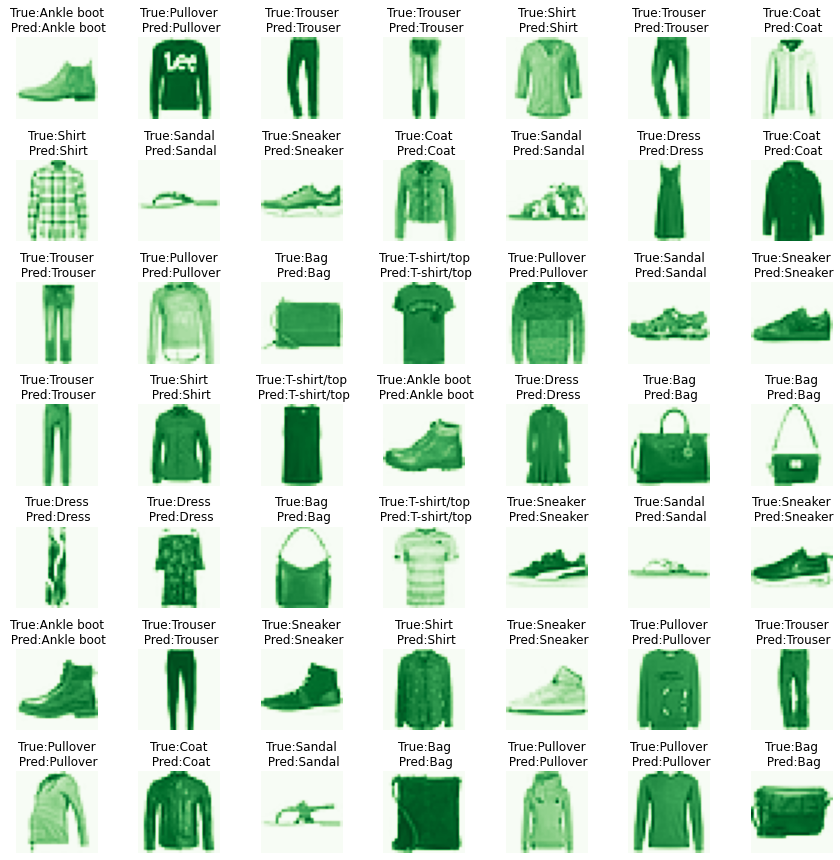

In [21]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('True:'+class_names[mnist_test_labels[correct[i]]]+'\n Pred:'+class_names[predicted_classes[correct[i]]])
    plt.imshow(mnist_test_images[correct[i]], cmap='Greens')

---
And the first 25 incorrect predictions. We will use **red** color here.

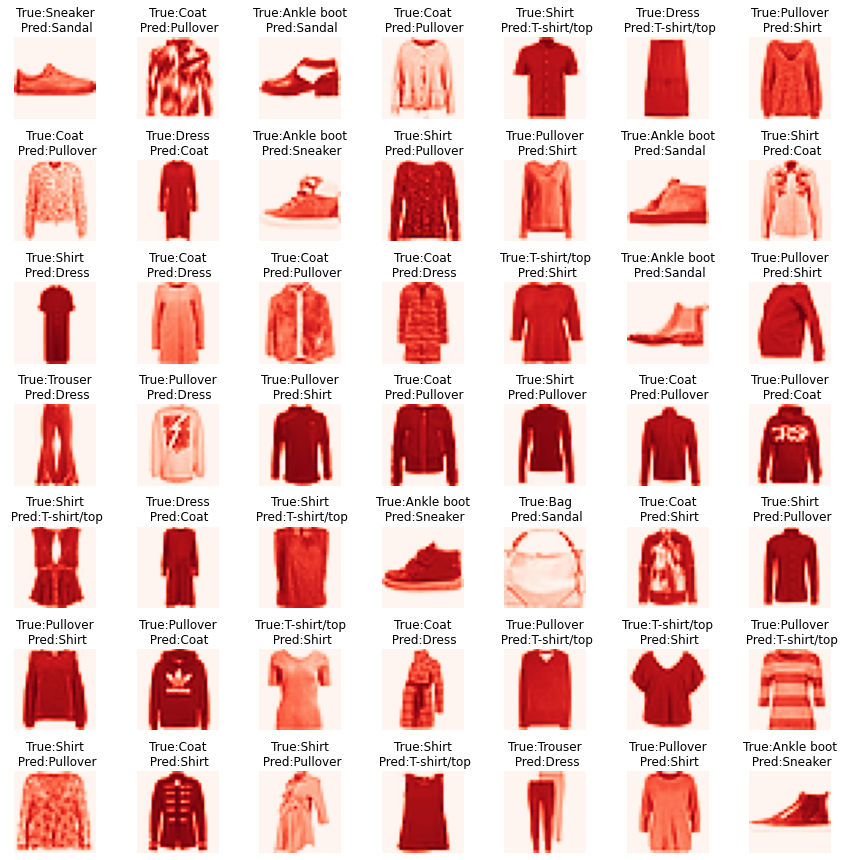

In [22]:
plt.figure(figsize=(15,15))
for i in range(0,49):
    plt.subplot(7,7,i+1)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.grid(False)
    plt.title('True:'+class_names[mnist_test_labels[incorrect[i]]]+'\n Pred:'+class_names[predicted_classes[incorrect[i]]])
    plt.imshow(mnist_test_images[incorrect[i]], cmap='Reds')

---
Let's take a look at the first incorrect prediction (index = 0). The output shows the probability that the algorithm asigns to the image being in each of the 10 categories.

In [23]:
index = 0
print('True Class of incorrect image '+str(index)+' is '+class_names[mnist_test_labels[incorrect[index]]])
print('Predictions:')
for i in range(10):
    print("{:06.2%}".format(predictions[incorrect[index]][i])+': '+class_names[i]+'')

True Class of incorrect image 0 is Sneaker
Predictions:
00.00%: T-shirt/top
00.00%: Trouser
00.00%: Pullover
00.00%: Dress
00.00%: Coat
57.30%: Sandal
00.00%: Shirt
42.68%: Sneaker
00.02%: Bag
00.01%: Ankle boot


---
A nice way to see what categories are confused with each other is to display the "confusion" matrix. The code is long mostly to make the image nice.

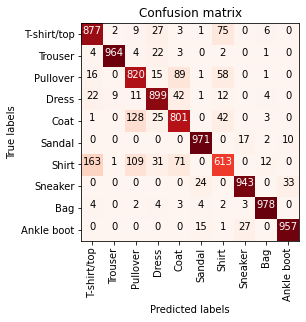

In [24]:
def plot_confusion_matrix(cm,class_,title='Confusion matrix',cmap=plt.cm.Reds):
    """
    This function plots a confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(class_))
    plt.xticks(tick_marks, class_, rotation=90)
    plt.yticks(tick_marks, class_)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
    plt.show()
    
plot_confusion_matrix(confusion_matrix(mnist_test_labels, predicted_classes), class_names)    

Time the read the confusion matrix above. The left side shows the correct label. The bottom shows the predicted label. For example, the first number on the first row shows the number of T-shirt/top images that are corrected labeled as T-shirt/tops. The second number of the first row shows the number of T-shirt/top images that are incorrectly labeled as Trouser.

Which image category does the model perform the worst on? In other words which image category is recognized in the lowest proportion? (Hint: All rows add up to 1000, so you don't have to worry about calculating percentages)? Which category is it confused with the most?

### <span style="color:red">__Question 12:__</span> Which category does the model recognize the least?
### <span style="color:red">__Question 13:__</span> Which category is the above confused with the most?

Now let's say you don't mind if these two are confused, it's not a big deal and you just merge the two categories. How much is the accuracy of our current model if you merge these two categories? (Hint: you can calculate this manually just by looking at the confusion matrix numbers, no need for more code).

### <span style="color:red">__Question 14:__</span> What is the accuracy of our current model on the test data if we merge the above two categories?


----
That's it, we're done! One more **IMPORTANT** **IMPORTANT** step. Click "File" and download this file as an .ipynb notebook. 

### <span style="color:red">__One Last Thing:__</span> Upload the .ipynb file